##  Ensemble learning

It helps enhance the performance of machine learning models. The concept behind it is simple. Multiple machine learning models are combined to obtain a more accurate model.

### 1. Bagging
### 2. Boosting
### 3. Stacking

A problem in machine learning is that individual models tend to perform poorly. In other words, they tend to have low prediction accuracy. To mitigate this problem, we combine multiple models to get one with a better performance.

The individual models that we combine are known as weak learners. We call them weak learners because they either have a high bias or high variance.

### A high-bias model results from not learning data well enough. It is not related to the distribution of the data. Hence future predictions will be unrelated to the data and thus incorrect.

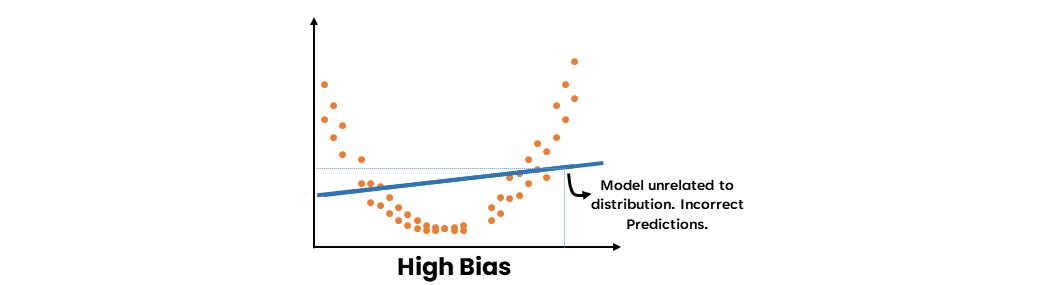

### A high variance model results from learning the data too well. It varies with each data point. Hence it is impossible to predict the next point accurately.

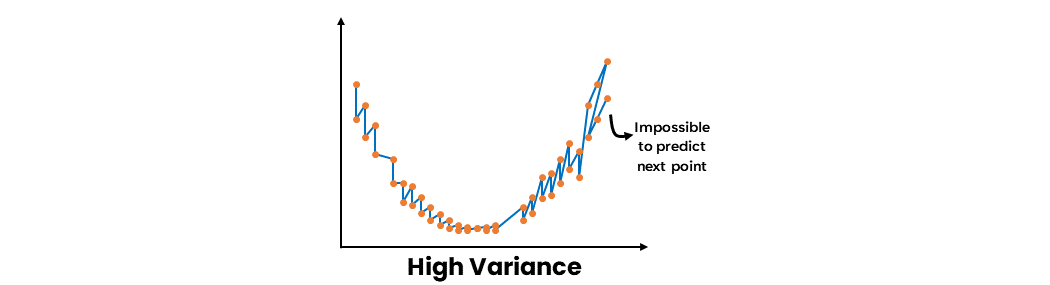

### Ensemble learning improves a model’s performance in mainly three ways:

1. By reducing the variance of weak learners
2. By reducing the bias of weak learners,
3. By improving the overall accuracy of strong learners.

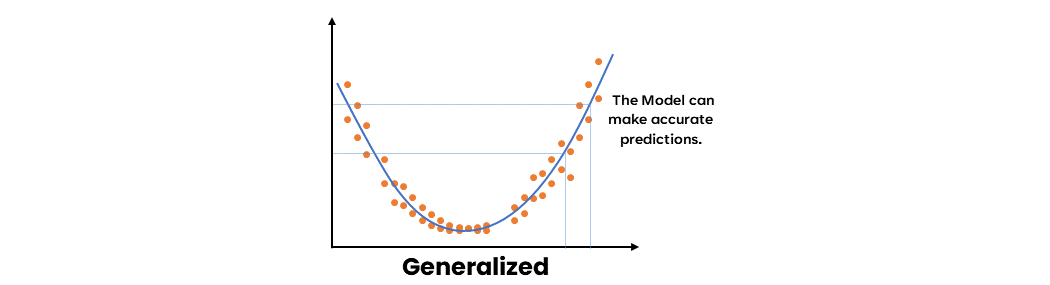

## Impact on Coefficients:

### Lasso or L1:

Tends to shrink some coefficients exactly to zero, performing feature selection.

### Ridge or L2:

Shrinks coefficients toward zero but rarely makes them exactly zero.

## Use cases

### Lasso:

When you suspect that many features are irrelevant or redundant.
Feature selection is a priority.



### Ridge:
When dealing with multicollinearity among the features.
Maintaining all features in the model is desirable.

## Reducing Variance with Bagging

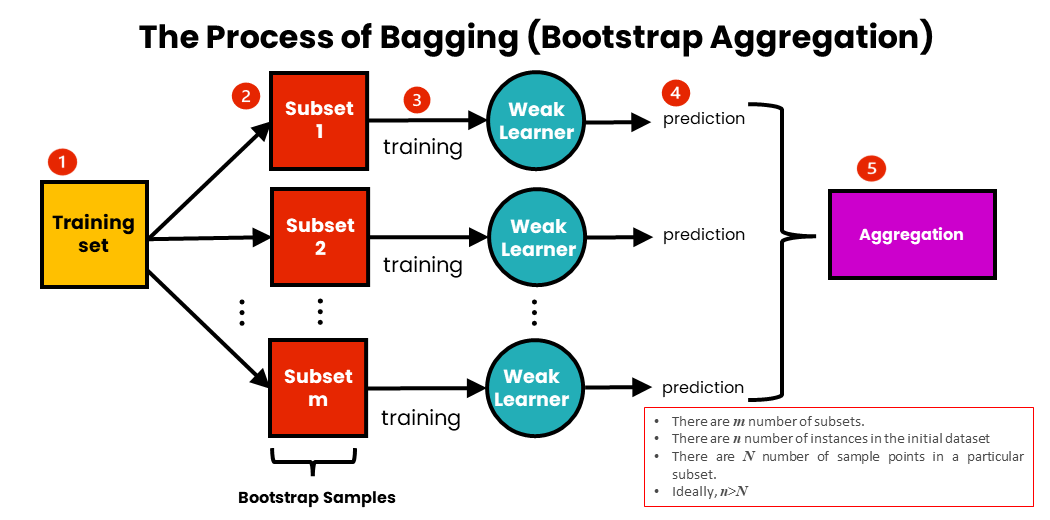

The steps of bagging are as follows:

1. We have an initial training dataset containing n-number of instances.
2. We create a m-number of subsets of data from the training set.  We take a subset of N sample points from the initial dataset for each subset. Each subset is taken with replacement. This means that a specific data point can be sampled more than once.
3. For each subset of data, we train the corresponding weak learners independently. These models are homogeneous, meaning that they are of the same type.
4. Each model makes a prediction.
5. The predictions are aggregated into a single prediction. For this, either max voting or averaging is used.

## Reducing Bias by Boosting

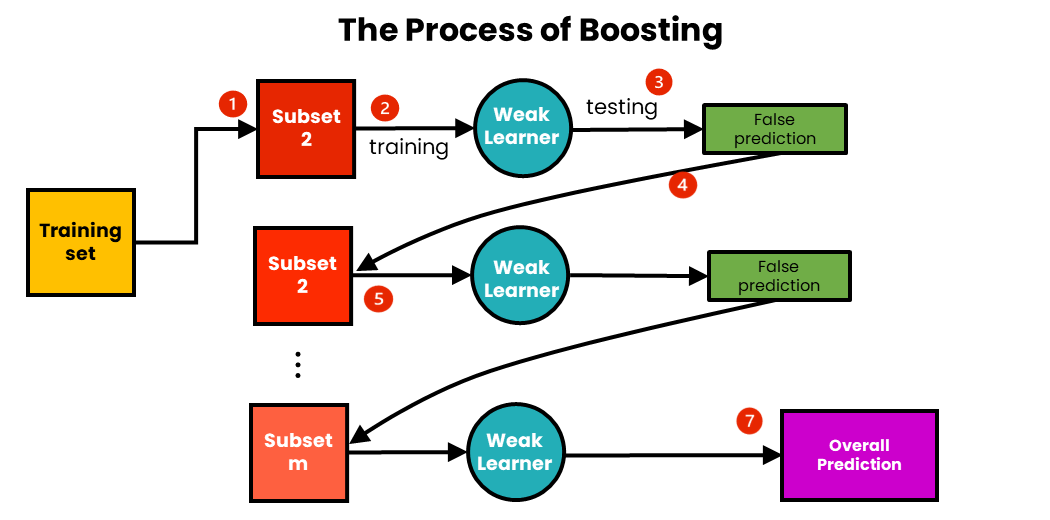

Boosting works with the following steps:

1. We sample m-number of subsets from an initial training dataset.
2. Using the first subset, we train the first weak learner.
3. We test the trained weak learner using the training data. As a result of the testing, some data points will be incorrectly predicted.
4. Each data point with the wrong prediction is sent into the second subset of data, and this subset is updated.
5. Using this updated subset, we train and test the second weak learner.
6. We continue with the following subset until the total number of subsets is reached.
7. We now have the total prediction. The overall prediction has already been aggregated at each step, so there is no need to calculate it.

## Improving Model Accuracy with Stacking

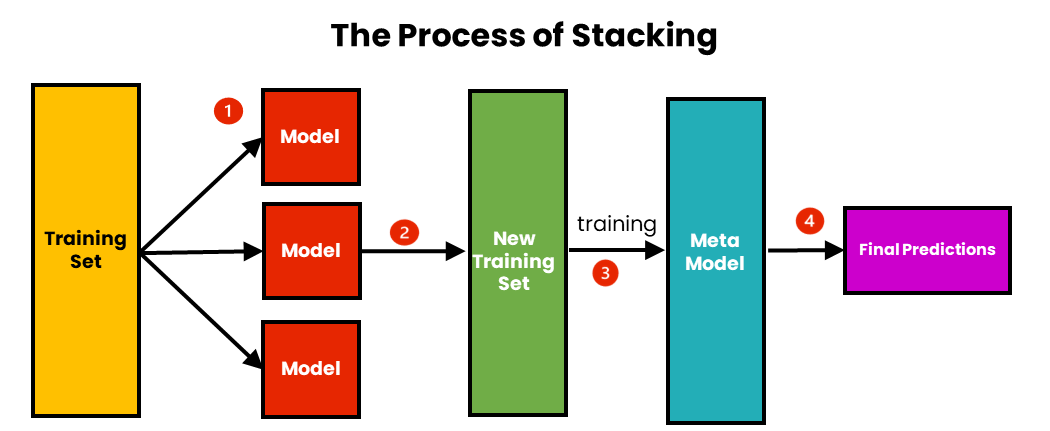

The steps of Stacking are as follows:

1. We use initial training data to train m-number of algorithms.
2. Using the output of each algorithm, we create a new training set.
3. Using the new training set, we create a meta-model algorithm.
4. Using the results of the meta-model, we make the final prediction. The results are combined using weighted averaging.

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [91]:
data = pd.read_csv(r"D:\DataSoCool\Data\classification\credit_score.csv")
data.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [92]:
pd.set_option('display.max_columns',40)
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [93]:
# Get list of categorical variables
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['ID',
 'CustomerID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'TypeofLoan',
 'PaymentofMinAmount',
 'PaymentBehaviour',
 'CreditScore']

In [94]:
# Get list of numerical variables
num = (data.dtypes == 'int64')
numerical_cols = list(num[num].index)

numerical_cols

['Age',
 'NumBankAccounts',
 'NumCreditCard',
 'InterestRate',
 'NumofLoan',
 'Delayfromduedate']

In [95]:
data['score'] = np.where(data['CreditScore']!='Poor',0,1)
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [96]:
for i in data[['ID', 'CustomerID', 'Name', 'TypeofLoan', 'SSN']]:
    data.drop(i,axis=1,inplace=True)

In [97]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [98]:
for i in data[['MonthlyInhandSalary','NumofDelayedPayment','ChangedCreditLimit','NumCreditInquiries','Amountinvestedmonthly','MonthlyBalance','Occupation']]:
    if data[i].dtype == 'object':
        mode = data[i].mode()[0]
        data[i].fillna(mode, inplace=True)
    else:
        mean = data[i].mean()
        data[i].fillna(mean, inplace=True)

In [99]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

In [100]:
corr = data.corr()['score']

# select highly correlated features
high_corr_feats = corr[abs(corr) > 0.01].index.tolist()

high_corr_feats

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_11124\2634856893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['score']


['MonthlyInhandSalary',
 'Delayfromduedate',
 'ChangedCreditLimit',
 'OutstandingDebt',
 'CreditUtilizationRatio',
 'Amountinvestedmonthly',
 'MonthlyBalance',
 'score']

In [101]:
data = data[['MonthlyInhandSalary','Delayfromduedate','ChangedCreditLimit','OutstandingDebt','CreditUtilizationRatio','Amountinvestedmonthly',
'MonthlyBalance','Occupation','Month','PaymentofMinAmount','PaymentBehaviour','score']]

data

,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,1824.843333,3,11.270000,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,4193.181285,-1,11.270000,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,4193.181285,3,10.385851,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,4193.181285,5,6.270000,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,1824.843333,6,11.270000,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,3359.415833,20,9.500000,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,3359.415833,23,11.500000,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,3359.415833,18,11.500000,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,3359.415833,27,11.500000,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [102]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly',
'MonthlyBalance']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.050698,Delayfromduedate
1,3.772889,ChangedCreditLimit
2,4.342809,OutstandingDebt
3,1.749134,Amountinvestedmonthly
4,2.389092,MonthlyBalance


In [103]:
data = data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly',
'MonthlyBalance','Occupation','Month','PaymentofMinAmount','PaymentBehaviour','score']]

data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,3,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


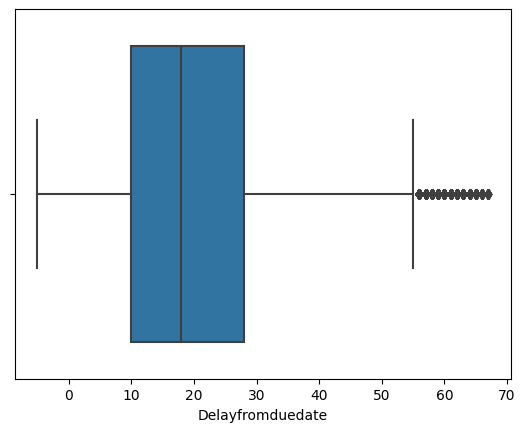

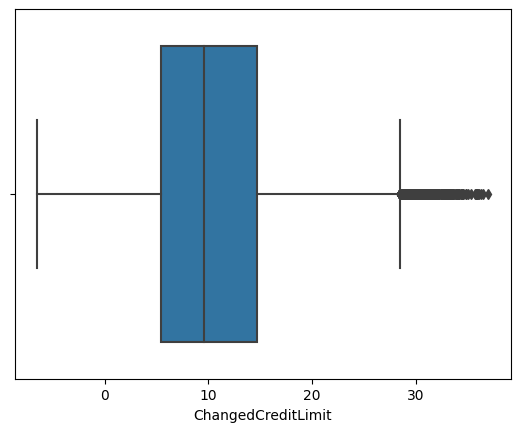

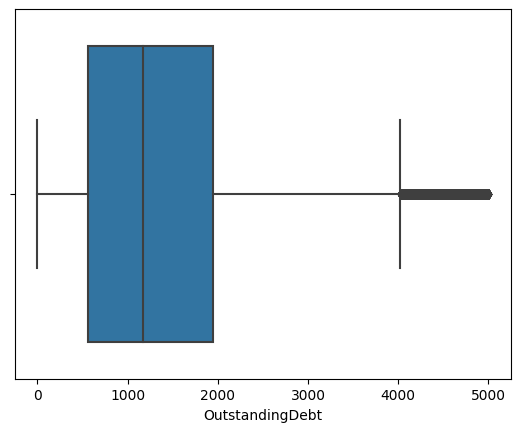

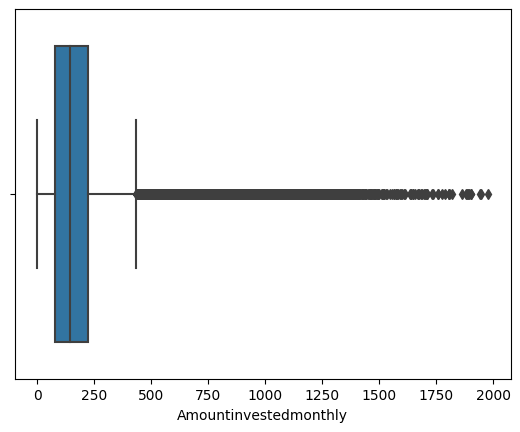

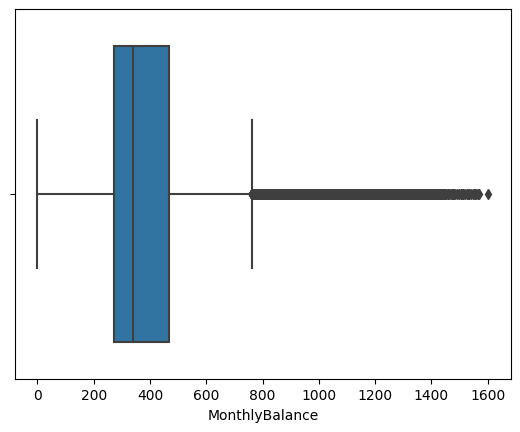

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [105]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_11124\3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_11124\3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [106]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_11124\1196502253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_11124\1196502253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


In [107]:
data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour', 'score'],
      dtype='object')

In [108]:
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [133]:
inputs = data[['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour']]
output = data['score']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)


In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install lgb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lgb (from versions: none)
ERROR: No matching distribution found for lgb

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install catboost

                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB 1.4 MB/s eta 0:01:14
                                            0.0/101.0 MB 393.8 kB/s eta 0:04:17
                                            0.1/101.0 MB 939.4 kB/s eta 0:01:48
                                            0.1/101.0 MB 804.6 kB/s eta 0:02:06
                                              0.2/101.0 MB 1.1 MB/s eta 0:01:31
                                              0.3/101.0 MB 1.2 MB/s eta 0:01:25
                                              0.5/101.0 MB 1.7 MB/s eta 0:00:58
                                              0.6/101.0 MB 1.8 MB/s eta 0:00:55
                                              0.8/101.0 MB 2.1 MB/s eta 0:00:48
                                              1.0/101.0 MB 2.5 MB/s eta 0:00:41
                                              1.0/101.0 MB 2.5 MB/s eta 0:00:41
                                              1


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from catboost import CatBoostClassifier

In [5]:
from xgboost import XGBClassifier

In [8]:
from lightgbm import LGBMClassifier

# CatBoost Model

In [136]:
catboost_model = CatBoostClassifier(cat_features=['Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour'])

In [137]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.059706
0:	learn: 0.6625727	total: 104ms	remaining: 1m 43s
1:	learn: 0.6350748	total: 210ms	remaining: 1m 44s
2:	learn: 0.6119453	total: 341ms	remaining: 1m 53s
3:	learn: 0.5917333	total: 471ms	remaining: 1m 57s
4:	learn: 0.5739371	total: 562ms	remaining: 1m 51s
5:	learn: 0.5576768	total: 665ms	remaining: 1m 50s
6:	learn: 0.5446576	total: 785ms	remaining: 1m 51s
7:	learn: 0.5325571	total: 908ms	remaining: 1m 52s
8:	learn: 0.5218763	total: 1.05s	remaining: 1m 55s
9:	learn: 0.5127152	total: 1.17s	remaining: 1m 56s
10:	learn: 0.5037760	total: 1.31s	remaining: 1m 57s
11:	learn: 0.4968157	total: 1.42s	remaining: 1m 56s
12:	learn: 0.4908243	total: 1.54s	remaining: 1m 56s
13:	learn: 0.4853142	total: 1.66s	remaining: 1m 56s
14:	learn: 0.4803945	total: 1.82s	remaining: 1m 59s
15:	learn: 0.4754803	total: 1.96s	remaining: 2m
16:	learn: 0.4709295	total: 2.09s	remaining: 2m
17:	learn: 0.4676070	total: 2.21s	remaining: 2m
18:	learn: 0.4648627	total: 2.31s	remaining: 1m 59s
19:	

In [138]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 70.28148113046096
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     18596
           1       0.72      0.58      0.64      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.74      0.76     26249
weighted avg       0.80      0.81      0.80     26249

[[16820  1776]
 [ 3188  4465]]


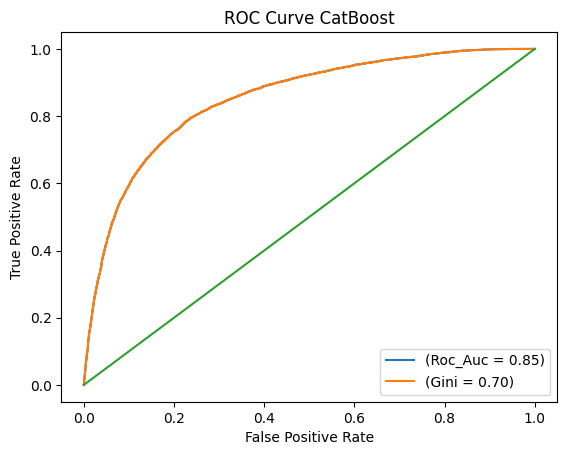

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

# XGB model

In [116]:
lgb_clf = XGBClassifier()
lgb_clf.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Occupation: object, Month: object, PaymentofMinAmount: object, PaymentBehaviour: object

In [140]:
inputs = data[['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour']]
output = data['score']

In [141]:
new_data = data.copy()

In [142]:
new_data.describe(include='all')

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
count,87495.000000,87495.000000,87495.000000,87495.000000,87495.000000,87495,87495,87495,87495,87495.000000
unique,NaN,NaN,NaN,NaN,NaN,15,8,3,7,NaN
top,NaN,NaN,NaN,NaN,NaN,Lawyer,January,Yes,LowspentSmallvaluepayments,NaN
freq,NaN,NaN,NaN,NaN,NaN,11940,10970,45810,22237,NaN
mean,20.887228,10.369890,1400.498980,173.106721,387.826475,NaN,NaN,NaN,NaN,0.289731
std,14.428935,6.658361,1087.207412,121.518374,172.647850,NaN,NaN,NaN,NaN,0.453640
min,-5.000000,-6.490000,0.230000,0.000000,0.007760,NaN,NaN,NaN,NaN,0.000000
25%,10.000000,5.425000,566.400000,76.962414,270.918218,NaN,NaN,NaN,NaN,0.000000
50%,18.000000,9.560000,1166.230000,143.312984,338.590600,NaN,NaN,NaN,NaN,0.000000
75%,28.000000,14.640000,1948.980000,219.931271,467.662120,NaN,NaN,NaN,NaN,1.000000


In [143]:
new_data = pd.get_dummies(new_data, drop_first=True)

In [144]:
new_data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'score',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'PaymentofMinAmount_No',
       'PaymentofMinAmount_Yes',
       'PaymentBehaviour_HighspentMediumvaluepayments',
       'PaymentBehaviour_HighspentSmallvaluepayments',
       'PaymentBehaviour_LowspentLargevaluepayments',
       'PaymentBehaviour_LowspentMediumvaluepayments',
       'PaymentBehaviour_LowspentSmallvaluepayments',
       'PaymentBehaviour_other'],
      dtype='object')

In [145]:
inputs = new_data.drop('score', axis=1)
output = new_data['score']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [124]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [125]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_lgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 73.64431405592494
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     18596
           1       0.73      0.61      0.66      7653

    accuracy                           0.82     26249
   macro avg       0.79      0.76      0.77     26249
weighted avg       0.81      0.82      0.81     26249

[[16841  1755]
 [ 3007  4646]]


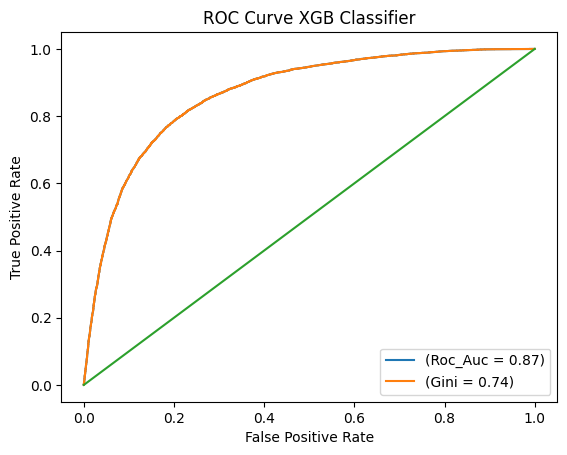

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

# Light GBM model

In [127]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

LGBMClassifier()

In [128]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 70.52850536233701
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     18596
           1       0.72      0.58      0.64      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.74      0.76     26249
weighted avg       0.80      0.81      0.80     26249

[[16843  1753]
 [ 3202  4451]]


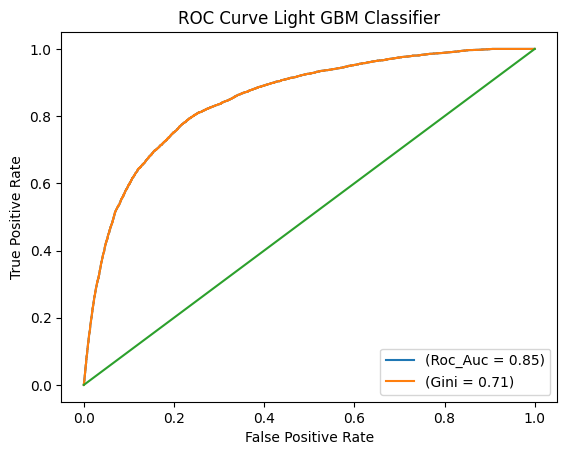

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light GBM Classifier')

plt.legend(loc='lower right')
plt.show()

# Catboost model after conversion

In [130]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.059706
0:	learn: 0.6627208	total: 28.3ms	remaining: 28.3s
1:	learn: 0.6347773	total: 55.1ms	remaining: 27.5s
2:	learn: 0.6107531	total: 89.9ms	remaining: 29.9s
3:	learn: 0.5905266	total: 108ms	remaining: 27s
4:	learn: 0.5718052	total: 127ms	remaining: 25.4s
5:	learn: 0.5566074	total: 149ms	remaining: 24.6s
6:	learn: 0.5434205	total: 173ms	remaining: 24.5s
7:	learn: 0.5308717	total: 193ms	remaining: 23.9s
8:	learn: 0.5204484	total: 220ms	remaining: 24.3s
9:	learn: 0.5114280	total: 245ms	remaining: 24.2s
10:	learn: 0.5041235	total: 265ms	remaining: 23.8s
11:	learn: 0.4957276	total: 284ms	remaining: 23.4s
12:	learn: 0.4900149	total: 304ms	remaining: 23.1s
13:	learn: 0.4849051	total: 323ms	remaining: 22.8s
14:	learn: 0.4793703	total: 341ms	remaining: 22.4s
15:	learn: 0.4754054	total: 360ms	remaining: 22.2s
16:	learn: 0.4713074	total: 380ms	remaining: 22s
17:	learn: 0.4677073	total: 402ms	remaining: 22s
18:	learn: 0.4648819	total: 432ms	remaining: 22.3s
19:	learn: 0.4

In [131]:
result_cb = evaluate(cb_clf, X_test, y_test)

Model Performance
Gini prob is 71.59215360766693
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18596
           1       0.72      0.60      0.65      7653

    accuracy                           0.82     26249
   macro avg       0.78      0.75      0.76     26249
weighted avg       0.81      0.82      0.81     26249

[[16816  1780]
 [ 3074  4579]]


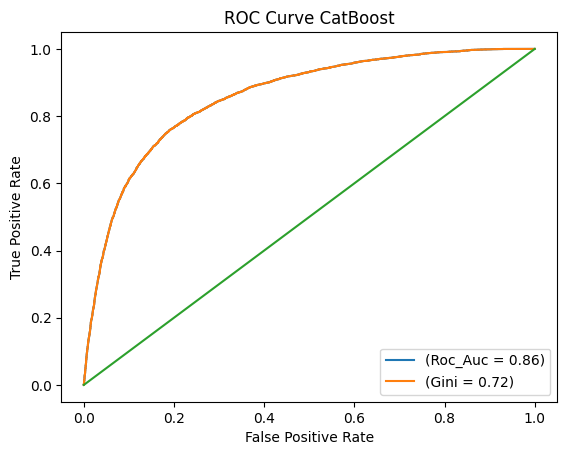

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = cb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [147]:
# Define the hyperparameters LGBM search 

from sklearn.model_selection import RandomizedSearchCV

#Learning rate - means how fast the model learns.
#The lower the learning rate, the slower the model learns. 
#The advantage of slower learning rate is that the model becomes more robust and efficient. 

#However, learning slowly comes at a cost.
#It takes more time to train the model which brings us to the other significant hyperparameter.

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [148]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [149]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [150]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)


Model Performance
Gini prob is 66.31636744210326
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     18596
           1       0.00      0.00      0.00      7653

    accuracy                           0.71     26249
   macro avg       0.35      0.50      0.41     26249
weighted avg       0.50      0.71      0.59     26249

[[18596     0]
 [ 7653     0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [151]:

# Define the hyperparameters XGBoost search
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), #  fraction of the training data used to train each tree.
    # Using a fraction of the data can help to prevent overfitting and improve generalization.
    'colsample_bytree': np.linspace(0.5, 1, num=6), #fraction of the features used to train each tree
    'gamma': [0, 1, 5]
    # Increasing the gamma value can help to prevent overfitting
    # Should be used only when you are using high depth
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [152]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [153]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [154]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)


Model Performance
Gini prob is 69.46888058075712
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     18596
           1       0.71      0.58      0.64      7653

    accuracy                           0.81     26249
   macro avg       0.78      0.74      0.76     26249
weighted avg       0.80      0.81      0.80     26249

[[16801  1795]
 [ 3194  4459]]


In [155]:
# Define the hyperparameters CatBoost search
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000], # number of boosting iterations to perform. 
    # More iterations will typically lead to better performance, but will also increase the training time.
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7), # L2 Regularization can help to prevent overfitting by penalizing large weights.
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [156]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6879681	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6828468	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6778903	total: 37.9ms	remaining: 12.6s
3:	learn: 0.6730518	total: 51ms	remaining: 12.7s
4:	learn: 0.6683011	total: 63.9ms	remaining: 12.7s
5:	learn: 0.6636650	total: 76.9ms	remaining: 12.7s
6:	learn: 0.6591913	total: 88.8ms	remaining: 12.6s
7:	learn: 0.6547896	total: 101ms	remaining: 12.5s
8:	learn: 0.6504955	total: 114ms	remaining: 12.6s
9:	learn: 0.6463623	total: 127ms	remaining: 12.6s
10:	learn: 0.6423759	total: 140ms	remaining: 12.6s
11:	learn: 0.6383896	total: 153ms	remaining: 12.6s
12:	learn: 0.6344105	total: 166ms	remaining: 12.6s
13:	learn: 0.6306093	total: 178ms	remaining: 12.5s
14:	learn: 0.6268212	total: 192ms	remaining: 12.6s
15:	learn: 0.6231925	total: 205ms	remaining: 12.6s
16:	learn: 0.6196270	total: 223ms	remaining: 12.9s
17:	learn: 0.6160917	total: 247ms	remaining: 13.5s
18:	learn: 0.6126617	total: 261ms	remaining: 13.5s
19:	learn: 0.6093416	total: 275ms	re

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000146B41196D0>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [157]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [158]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 66.7733861265742
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     18596
           1       0.71      0.57      0.63      7653

    accuracy                           0.81     26249
   macro avg       0.77      0.74      0.75     26249
weighted avg       0.80      0.81      0.80     26249

[[16809  1787]
 [ 3285  4368]]


# **Stacking**

In [9]:
pip install --upgrade mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -                                        0.0/1.4 MB 487.6 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 1.1 MB/s eta 0:00:02
     ----                                     0.2/1.4 MB 1.2 MB/s eta 0:00:02
     ------                                   0.2/1.4 MB 1.3 MB/s eta 0:00:01
     ---------                                0.4/1.4 MB 1.5 MB/s eta 0:00:01
     -------------                            0.5/1.4 MB 2.0 MB/s eta 0:00:01
     ------------------                       0.7/1.4 MB 2.0 MB/s eta 0:00:01
     -------------------------                0.9/1.4 MB 2.6 MB/s eta 0:00:01
     -------------------------------          1.1/1.4 MB 2.9 MB/s eta 0:00:01
     --------------------------------         1.2/1.4 MB 2.8 MB/s eta 0:00:01
     -----------------------------------      1.3/1.4 MB 2.7 MB/s eta


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [167]:
# Define the base classifiers
base_classifiers = [
    LGBMClassifier(),
    XGBClassifier()
]


In [169]:
# Define the meta-classifier
meta_classifier = CatBoostClassifier()

In [170]:
# Define the stacking classifier
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [171]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.1s finished


Learning rate set to 0.059706
0:	learn: 0.6531110	total: 22.2ms	remaining: 22.2s
1:	learn: 0.6176625	total: 40.9ms	remaining: 20.4s
2:	learn: 0.5873678	total: 60.5ms	remaining: 20.1s
3:	learn: 0.5622563	total: 81.5ms	remaining: 20.3s
4:	learn: 0.5413633	total: 101ms	remaining: 20.1s
5:	learn: 0.5239130	total: 122ms	remaining: 20.3s
6:	learn: 0.5089365	total: 144ms	remaining: 20.4s
7:	learn: 0.4964409	total: 165ms	remaining: 20.5s
8:	learn: 0.4855552	total: 186ms	remaining: 20.5s
9:	learn: 0.4757494	total: 210ms	remaining: 20.8s
10:	learn: 0.4672232	total: 231ms	remaining: 20.7s
11:	learn: 0.4602522	total: 250ms	remaining: 20.6s
12:	learn: 0.4541581	total: 271ms	remaining: 20.6s
13:	learn: 0.4480203	total: 292ms	remaining: 20.6s
14:	learn: 0.4428620	total: 312ms	remaining: 20.5s
15:	learn: 0.4380510	total: 333ms	remaining: 20.5s
16:	learn: 0.4340241	total: 354ms	remaining: 20.5s
17:	learn: 0.4308408	total: 374ms	remaining: 20.4s
18:	learn: 0.4284651	total: 395ms	remaining: 20.4s
19:	lea

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=N...
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...)],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x00000146B7F90450>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [172]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini prob is 74.21873482681272
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18596
           1       0.72      0.64      0.67      7653

    accuracy                           0.82     26249
   macro avg       0.79      0.77      0.78     26249
weighted avg       0.82      0.82      0.82     26249

[[16674  1922]
 [ 2785  4868]]


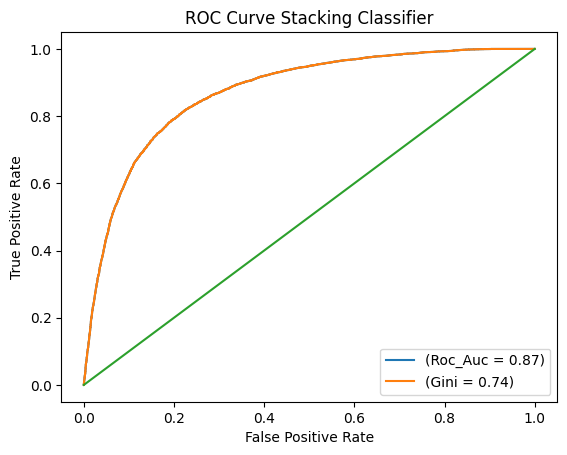

In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()